In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 # machine llearning
 #from lightgbm import LGBMClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 #plt.rcParams["axes.labelsize"] = 18
 import warnings
 warnings.filterwarnings('ignore')
 %matplotlib inline

In [4]:
train = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\Train.csv')
test = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\Test.csv')
ss = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\SampleSubmission.csv')
variables = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\VariableDefinitions.csv')

In [5]:
# lets abserve the shape of our database
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [6]:
# show list of column in a trai data
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [7]:
#inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
#check missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


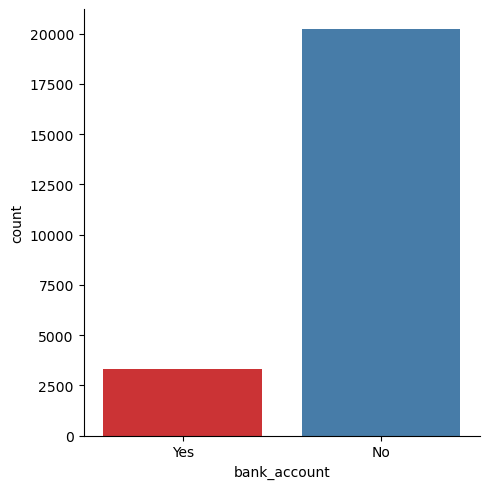

In [9]:
#explore target distribution
sns.catplot(x = "bank_account", kind="count",
data = train, palette = "Set1")

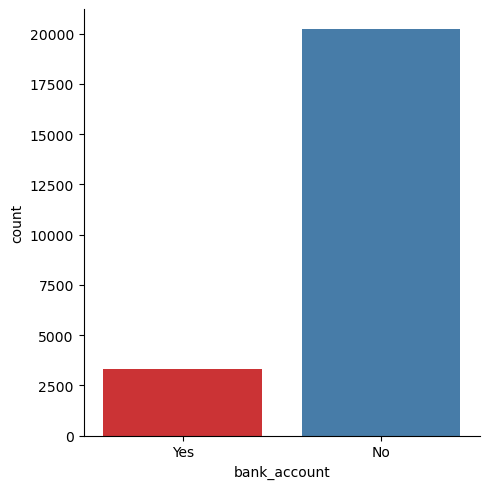

In [10]:
#explore target distribution
sns.catplot(x = "bank_account", kind="count",
data = train, palette = "Set1")

In [11]:
#show same information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [12]:
# lets view the variables
variables.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [13]:
#frequency table of variable will give the 
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

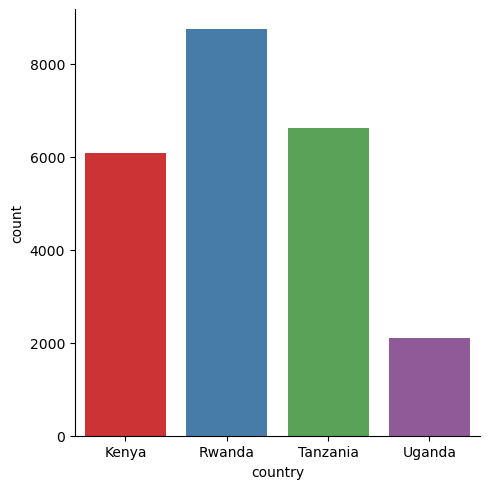

In [14]:
#explore target distribution
sns.catplot(x = "country", kind="count",
data = train, palette = "Set1")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

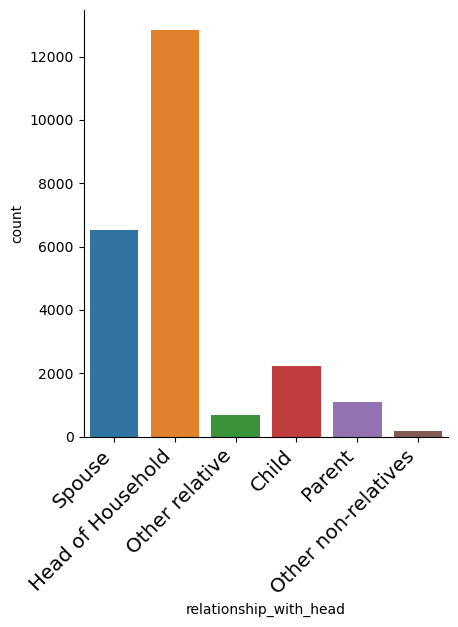

In [15]:
#explore target distribution
sns.catplot(x = "relationship_with_head", kind="count", data = train)

plt.xticks(
     rotation=45,
     horizontalalignment='right',
     fontweight='light',
     fontsize='x-large'
            )

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

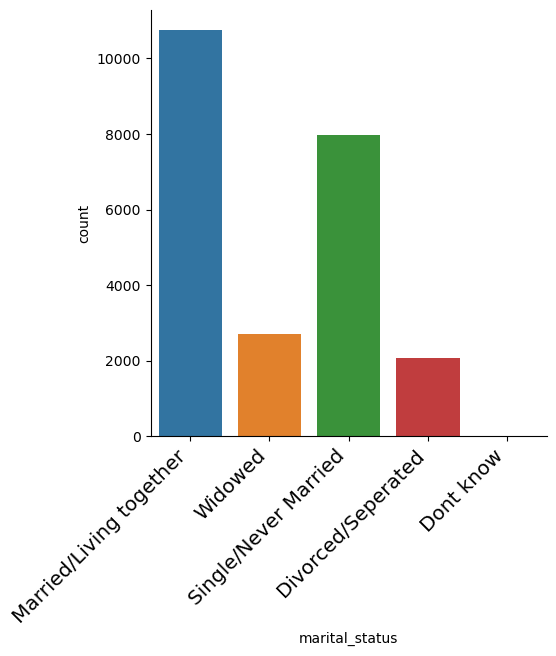

In [16]:
#explore target distribution
sns.catplot(x = "marital_status", kind="count", data = train)

plt.xticks(
     rotation=45,
     horizontalalignment='right',
     fontweight='light',
     fontsize='x-large'
            )

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

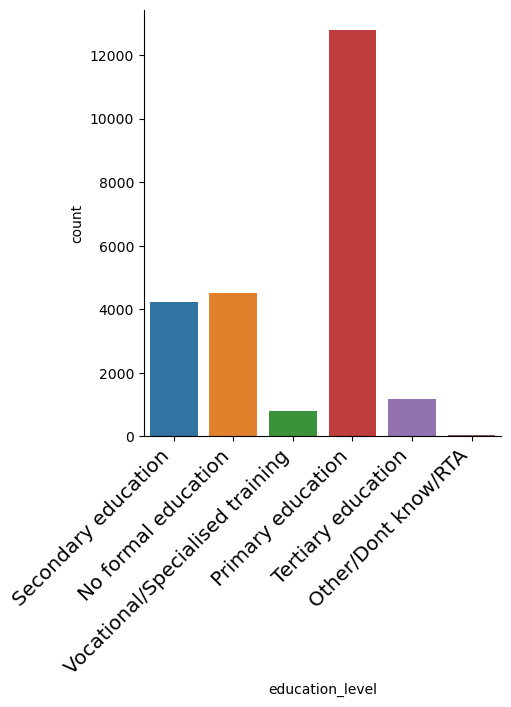

In [17]:
sns.catplot(x = "education_level", kind="count", data = train)

plt.xticks(
     rotation=45,
     horizontalalignment='right',
     fontweight='light',
     fontsize='x-large'
            )

Text(0.5, 0, 'Household size')

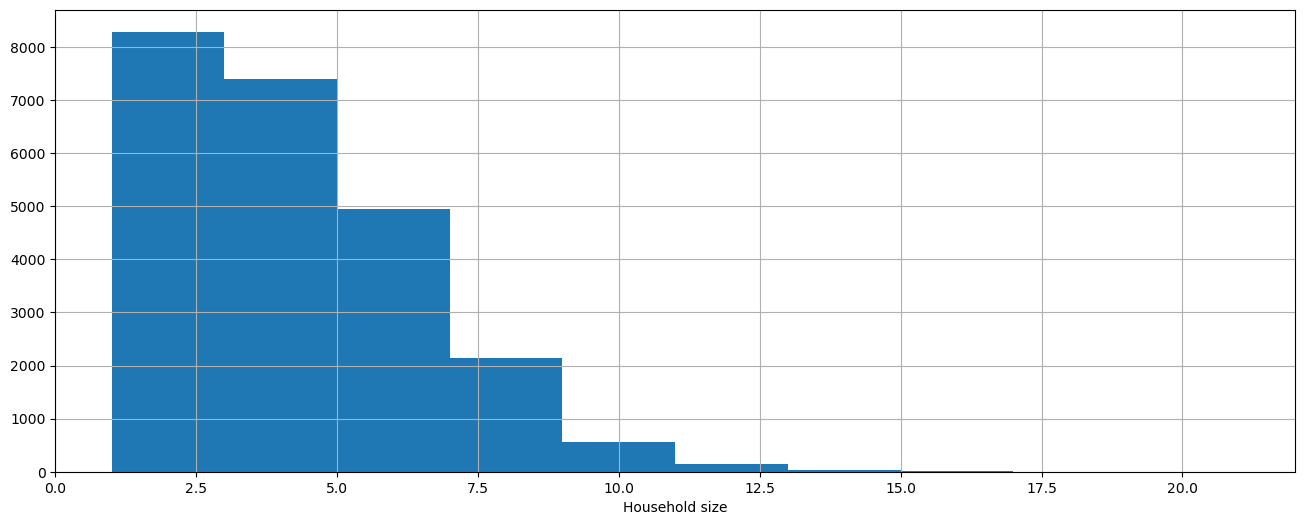

In [18]:
plt.figure(figsize=(16, 6))
train.household_size.hist()
plt.xlabel('Household size')

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

<Figure size 1600x600 with 0 Axes>

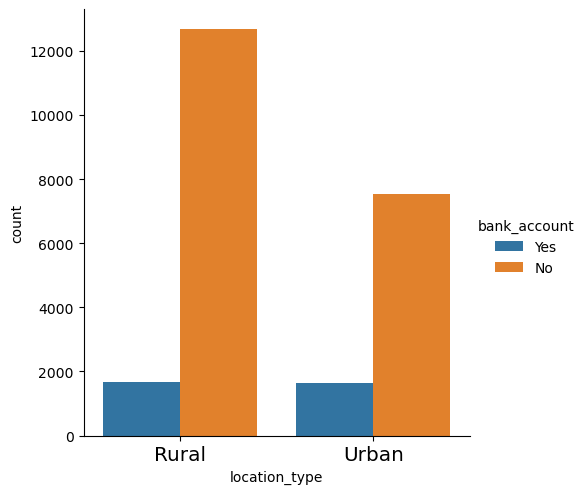

In [19]:
plt.figure(figsize=(16,6))
sns.catplot(x= 'location_type', hue= 'bank_account',
            kind= 'count', data=train)

plt.xticks(
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

<Figure size 1600x600 with 0 Axes>

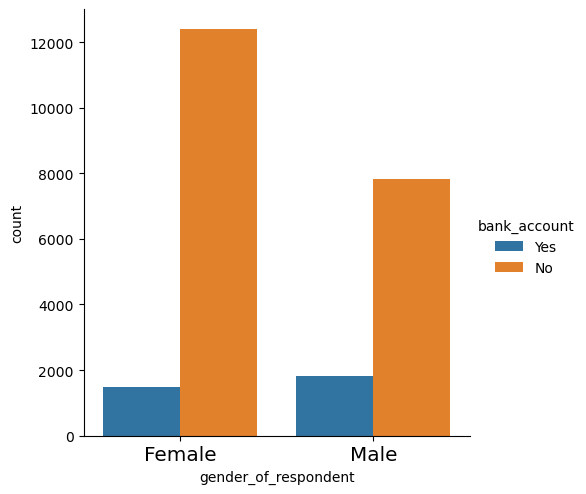

In [20]:
plt.figure(figsize=(16,6))
sns.catplot(x= 'gender_of_respondent', hue= 'bank_account',
            kind= 'count', data=train)

plt.xticks(
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x600 with 0 Axes>

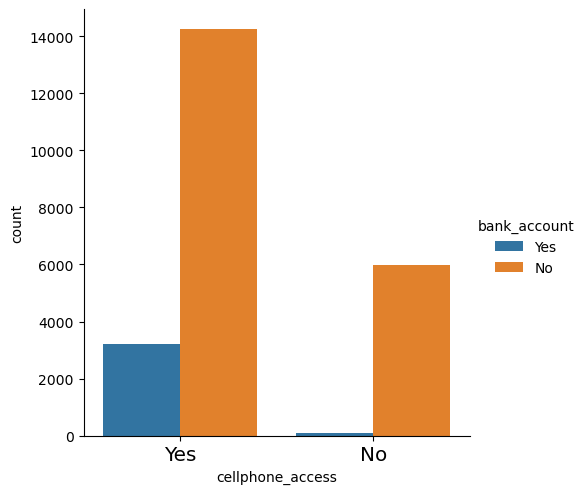

In [21]:
plt.figure(figsize=(16,6))
sns.catplot(x= 'cellphone_access', hue= 'bank_account',
            kind= 'count', data=train)

plt.xticks(
    fontweight='light',
    fontsize='x-large'
)

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])
x_train = train.drop(['bank_account'], axis = 1)
y_train = train['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [23]:
#function to process our data from train model
def preprocessing_data(data):
    #convert the following  numerical label from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

    #categorical fueture to be anverted to the hot encoding
    categ = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]

    #one hot encoding convertion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    #label encoder convertion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    #drop unique column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data in a range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)

    return data

In [24]:
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(test)

In [25]:
import sklearn.model_selection

In [26]:
# splint_train data
from sklearn.model_selection import train_test_split
x_train, X_Val, y_Train , y_val = train_test_split(processed_train,
                                                   y_train,
                                                   stratify = y_train,
                                                   test_size = 28,
                                                   random_state = 42
                                                  )

In [1]:
import xgboost

In [2]:
#import classifier algorism here
from xgboost import XGBClassifier

#creat models
xg_model = XGBClassifier()

#fitting the model
xg_model.fit(x_train, y_train)

NameError: name 'x_train' is not defined